In [1]:
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fontpath = '../bigdata anlysis II/src/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
matplotlib.font_manager._rebuild()

### 시계열 데이터 분석
 - 시계열 데이터: 연속적인 시간에 따라 측정되는 데이터
 - 시계열 데이터의 종류  
 1) 규칙적 시계열 데이터
 2) 불규칙적 시계열 데이터

# Step1. 탐색: 시간 정보가 포함된 데이터 살펴보기

#### * market price 데이터셋의 기본정보 구하기

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "data/market-price.csv"
df_bitcoin = pd.read_csv(file_path, names=['day', 'price'])

print(df_bitcoin.shape)
print(df_bitcoin.info())
df_bitcoin.tail()

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


,day,price
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231
364,2018-08-26 00:00:00,6673.274167


- 데이터셋은 총 1365개이다.
- 날짜, 가격에 대한 2개의 feature로 구성되어 있다. -> 시계열 데이터셋

#### * 시계열 정보를 데이터 프레임의 index로 설정, 가격의 추이를 시각화

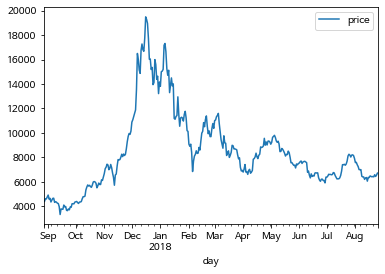

In [3]:
# to_datetime으로 day 피처를 시계열 피처로 변환
df_bitcoin['day'] = pd.to_datetime(df_bitcoin['day'])

# day 피처를 df_bitcoin 데이터 프레임 index로 설정
df_bitcoin.index = df_bitcoin['day']
df_bitcoin.set_index('day', inplace=True)

#  day별 비트코인 시세를 시각화
df_bitcoin.plot()
plt.show()

# Step2. 예측: 파이썬 라이브러리를 활용해서 시세 예측하기

#### * ARIMA 모델 활용하기: 모델 학습

In [11]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다
model = ARIMA(df_bitcoin.price.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\Users\ma221\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.553
Method:                       css-mle   S.D. of innovations            512.415
Date:                Tue, 08 Jun 2021   AIC                           5587.107
Time:                        23:44:40   BIC                           5610.490
Sample:                             1   HQIC                          5596.400
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3729     27.794      0.229      0.819     -48.103      60.849
ar.L1.D.y     -0.3792      1.833     -0.207      0.836      -3.972       3.213
ar.L2.D.y      0.1583      1.195      0.132      0.8

C:\Users\ma221\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


#### 범주형 변수 정규화: 원-핫 인코딩
- pandas에서는 get_dummies()라는 함수로 간단하게 적용 가능

#### * feature들의 단위 맞춰주기: 원-핫 인코딩

#### * 회귀 분석을 위한 학습, 테스트 데이터셋 분리

# Step3. 평가: 예측 모델 평가하기

#### * 어떤 feature가 가장 영향력이 강한 feature일까
- 위에서 회귀 분석을 sklearn의 linear_model.LinearRegression()으로 수행했지만,  
statsmodel의 OLS 클래스로도 회귀 분석이 가능하고 summary() 함수를 사용하면  
계수에 대한 분석 내용을 자세하게 살펴볼 수 있다.

#### * 지금까지 학습한 coef(계수) 시각화하기

- FIP, WAR, 홈런, 연봉(2017) feature가 가장 영향력이 큰 것으로 볼 수 있다

###  따라서, feature 탐색 결과 1) 유의미한 feature인지 2) 영향력이 큰 feature인지 알 수 있다.

#### * 예측 모델 평가하기 : R2 score

- 학습 데이터 셋과 테스트 데이터 셋에 대한 평가 점수 차이는 벌어지지 않는 것이 좋다.  
 학습 데이터 셋 점수 >> 데이터 셋 점수: 과적합이 발생한 것  
 

- 회귀 모델을 평가할 때는 RMSE score라는 측정 지표를 활용할 수도 있다.  
RMSE score: 실제값과 예측값의 차이를 절대적인 수치로 나타낸 것  
RMSE score 값이 높으면 높을수록 예측이 부정확하다는 것을 의미

#### * feature들의 상관 관계 분석하기

* 다중 공선성?  
변수 간의 상관 관계가 높아 분석에 부정적인 영향을 미치는 것
  
  
* VIF(분산팽창용인)?  
다중 공선성을 평가할 수 있는 계수로, 10~15가 넘으면 그 feature는 다중 공선성의 문제가 발생했다고 판단한다.

# Step4. 시각화: 분석 결과 시각화하기

#### * 예측 연봉과 실제 연봉 비교하기

- 등분산을 가정하는 경우와 가정하지 않는 경우를 다 계산하는 이유  
 등분산일 때와 등분산이 아닐 경우 t-검정 통계량을 계산하는 방식이 달라지기 때문에 보통 t-test 전에 등분산 검정을 한다.  
   
   
- 등분산을 가정한 경우와 가정하지 않은 경우 모두 p-value가 0.000이하로 나타났다.
- 따라서 귀무가설:두 집단의 평균이 같다 -> 기각 -> 아프리카와 유럽 간의 맥주 소비량은 통계적으로 유의미하다.  

=> 그렇지만 여기 두 집단의 데이터 크기도 다르고, 각각의 크기 또한 크지 않기 때문에 실제로 통계적인 의미를 가지는 검정으로   보기는 어렵다.